In [161]:
import numpy as np
import matplotlib.pyplot as plt

In [162]:
def f(x):
    return x[0] * 5 + 3 * x[1]

In [163]:
# формируем список x1 точек с точкой остановки в 180 с шагом 0.1
x = np.arange(0,180,0.1)
# формируем x2 по машине 1
y1 = 40/0.25 - 0.5*x/0.25
# формируем x2 по машине 2
y2 = 36/0.3 - 0.4*x/0.3
# формируем x2 по машине 3
y3 = 36/0.4 - 0.2*x/0.4

In [164]:
# определяем поэлементные минимумы
y4 = np.minimum(y1, y3)

In [165]:
from skspatial.objects import Line

In [166]:
# строим линии для поиска точек пересения
line_1 = Line.from_points([x[0], y1[0]], [x[-1], y1[-1]])
line_2 = Line.from_points([x[0], y2[0]], [x[-1], y2[-1]])
line_3 = Line.from_points([x[0], y3[0]], [x[-1], y3[-1]])
# определяем точки пересечения
intersection_1_2 = line_1.intersect_line(line_2)
intersection_1_3 = line_1.intersect_line(line_3)
intersection_2_3 = line_2.intersect_line(line_3)

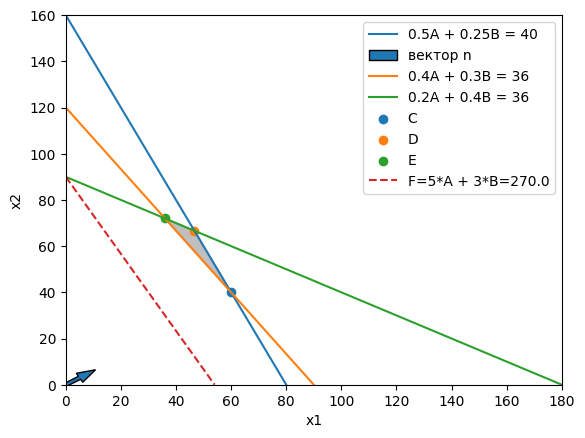

In [167]:
# построение графика
_ , ax =plt.subplots()
# строим график 0.5A + 0.25B = 40
ax.plot(x, y1, label='0.5A + 0.25B = 40')
# строим вектор градиента n
ax.arrow(0, 0, 5.0, 3.0, width = 1.5, label='вектор n')
# строим график 0.4A+0.3B = 36
ax.plot(x, y2, label='0.4A + 0.3B = 36')
# строим график 0.2A + 0.4B = 36
ax.plot(x, y3, label='0.2A + 0.4B = 36')
# заполняем область внутри треугольника CDE
ax.fill_between(x, y2, y4, where= (intersection_2_3.tolist()[0] < x) & ( x < intersection_1_2.tolist()[0]) ,color='grey', alpha=0.5)
# ставим точки пересечения
intersection_1_2.plot_2d(ax, label='C')
intersection_1_3.plot_2d(ax, label='D')
intersection_2_3.plot_2d(ax, label='E')
# строим график F = 5*A + 3*B, например равной 270
ax.plot([x[0],f([x[0], y3[0]])/5.0], [y3[0], 0.0], label=f'F=5*A + 3*B={f([x[0], y3[0]])}', linestyle='--')
# ограничиваем x1, x2 только положительными числами
plt.xlim(0, 180)
plt.ylim(0, 160)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [168]:
print('max F(x1, x2) =', f([60.0, 40.0]))

max F(x1, x2) = 420.0
